# Time Series Linear Regression

## <u>Case Study</u>: Stock Price Prediction for Apple

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [2]:
# import data named prices-split-adjusted.csv
df = pd.read_csv('prices-split-adjusted.csv')
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
# only use data from AAPL and save it to a new dataframe
df_aapl = df[df['symbol'] == 'AAPL']
# reset index
df_aapl = df_aapl.reset_index(drop=True)
df_aapl.head()

,date,symbol,open,close,low,high,volume
0,2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0
1,2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0
2,2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0
3,2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0
4,2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0


In [4]:
# check for missing values
df_aapl.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

## Basic Descriptive Analytics

In [5]:
# first 5 rows of the dataframe
df_aapl.head()

,date,symbol,open,close,low,high,volume
0,2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0
1,2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0
2,2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0
3,2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0
4,2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0


In [6]:
# drop the symbol column
df_aapl = df_aapl.drop('symbol', axis=1)

In [7]:
df_aapl.shape

(1762, 6)

In [8]:
df_aapl.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,79.427744,79.402683,78.640034,80.140447,9.422578e+07
std,28.339001,28.330794,28.108525,28.561027,6.020519e+07
min,27.481428,27.435715,27.178572,28.000000,1.147590e+07
25%,55.401787,55.450000,54.672501,55.909286,4.917478e+07
50%,78.742146,78.435711,77.631428,79.344284,8.050385e+07
75%,102.979998,103.092503,102.500000,104.424997,1.210816e+08
max,134.460007,133.000000,131.399994,134.539993,4.702495e+08


In [9]:
# convert date column to datetime
df_aapl['date'] = pd.to_datetime(df_aapl['date'])

# order data by date
df_aapl = df_aapl.sort_values(by='date')
df_aapl.head()

,date,open,close,low,high,volume
0,2010-01-04,30.490000,30.572857,30.340000,30.642857,123432400.0
1,2010-01-05,30.657143,30.625713,30.464285,30.798571,150476200.0
2,2010-01-06,30.625713,30.138571,30.107143,30.747143,138040000.0
3,2010-01-07,30.250000,30.082857,29.864286,30.285715,119282800.0
4,2010-01-08,30.042856,30.282858,29.865715,30.285715,111902700.0


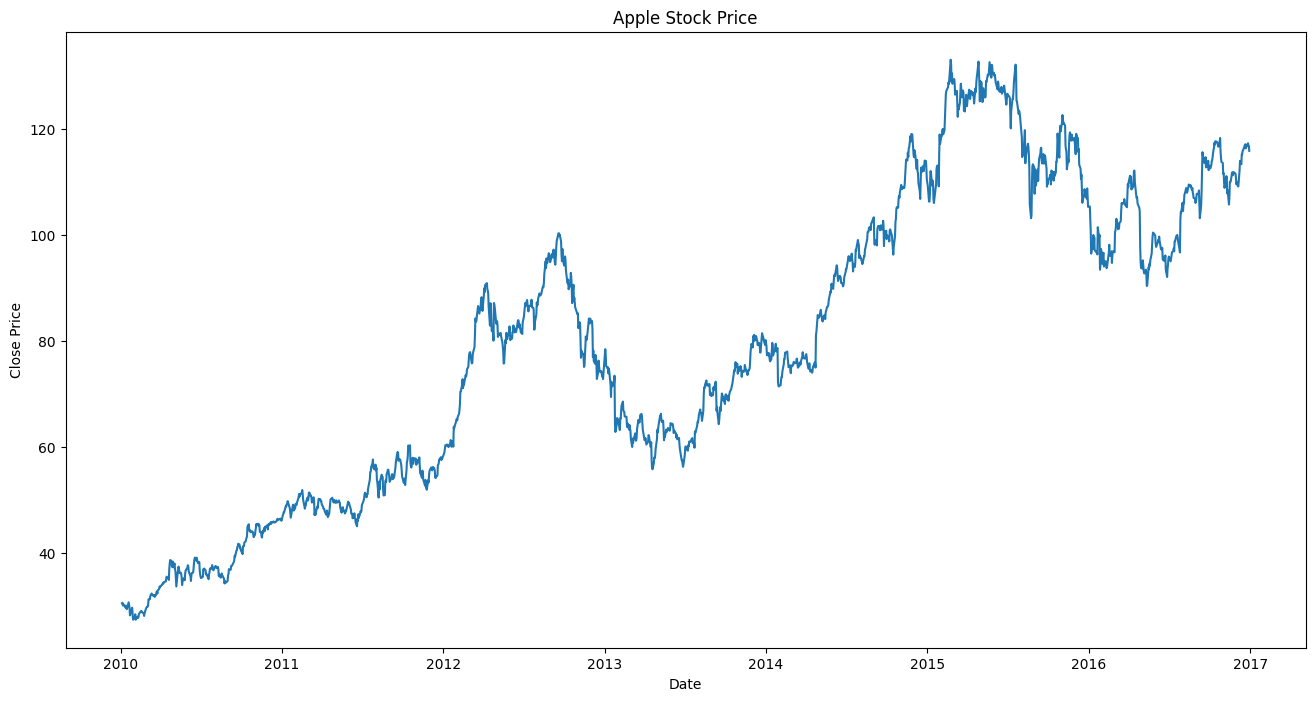

In [10]:
# time series plot
plt.figure(figsize=(16, 8))
plt.plot(df_aapl['date'], df_aapl['close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Apple Stock Price')
plt.show()

## Training and Testing

Target = weight_1 * feature_1 + weight_2 * feature_2 + bias

This is basically ordinary least squares which chooses values that minimize the squared error between the target and the predictions.

In [11]:
import warnings
warnings.filterwarnings('ignore')

# introduce a lag feature of 5 days with for loop
for i in range(1, 6):
    df_aapl['lag_close_{}'.format(i)] = df_aapl['close'].shift(i)

df_aapl.head(10)

,date,open,close,low,high,volume,lag_close_1,lag_close_2,lag_close_3,lag_close_4,lag_close_5
0,2010-01-04,30.490000,30.572857,30.340000,30.642857,123432400.0,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,30.657143,30.625713,30.464285,30.798571,150476200.0,30.572857,NaN,NaN,NaN,NaN
2,2010-01-06,30.625713,30.138571,30.107143,30.747143,138040000.0,30.625713,30.572857,NaN,NaN,NaN
3,2010-01-07,30.250000,30.082857,29.864286,30.285715,119282800.0,30.138571,30.625713,30.572857,NaN,NaN
4,2010-01-08,30.042856,30.282858,29.865715,30.285715,111902700.0,30.082857,30.138571,30.625713,30.572857,NaN
5,2010-01-11,30.400000,30.015715,29.778572,30.428572,115557400.0,30.282858,30.082857,30.138571,30.625713,30.572857
6,2010-01-12,29.884285,29.674286,29.488571,29.967142,148614900.0,30.015715,30.282858,30.082857,30.138571,30.625713
7,2010-01-13,29.695715,30.092857,29.157143,30.132856,151473000.0,29.674286,30.015715,30.282858,30.082857,30.138571
8,2010-01-14,30.015715,29.918571,29.860001,30.065714,108223500.0,30.092857,29.674286,30.015715,30.282858,30.082857
9,2010-01-15,30.132856,29.418571,29.410000,30.228571,148516900.0,29.918571,30.092857,29.674286,30.015715,30.282858


Target = weight * lag + bias

In [12]:
# drop rows with missing values
df_aapl = df_aapl.dropna()

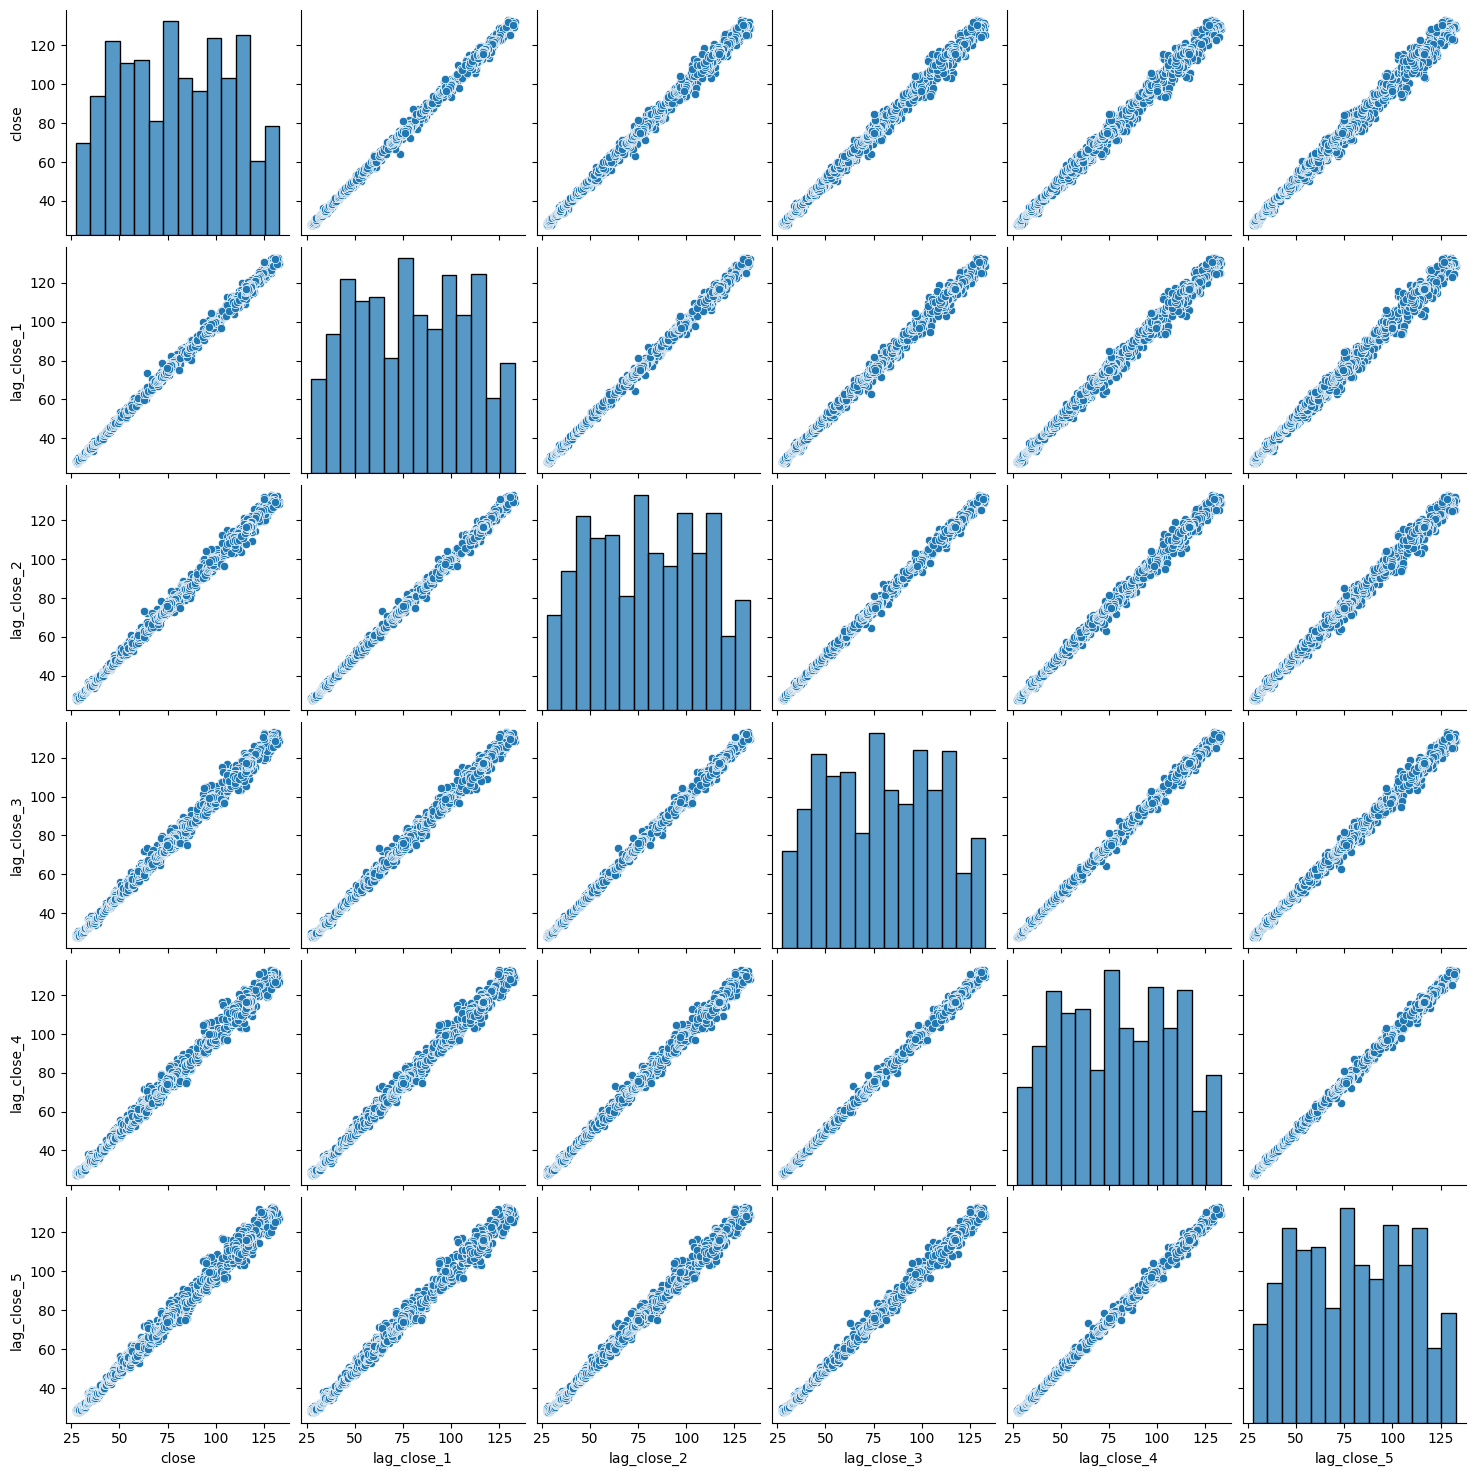

In [13]:
# pairplot with lag features
sns.pairplot(df_aapl[['close', 'lag_close_1', 'lag_close_2', 'lag_close_3', 'lag_close_4', 'lag_close_5']])
plt.show()

We can see from the lag plot that close price of Apple stock are correlated with closing price from the previous day. They are all have almost linear relationship with each other. So the lag feature will be useful for linear model. Lag features let the model serial dependence.

In [14]:
# create a time dummy variable
df_aapl['time'] = df_aapl.index

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# split the data 70/30 with 70% training, 30% testing
train = df_aapl.iloc[:int(df_aapl.shape[0]*0.7)]
test = df_aapl.iloc[int(df_aapl.shape[0]*0.7):]

In [16]:
# create the model
model = LinearRegression()

# fit the model on the training data with the lag features
model.fit(train.drop(['date', 'close','open', 'low', 'high', 'volume'], axis=1), train['close'])

LinearRegression()

Mean Squared Error:  3.078700358100171


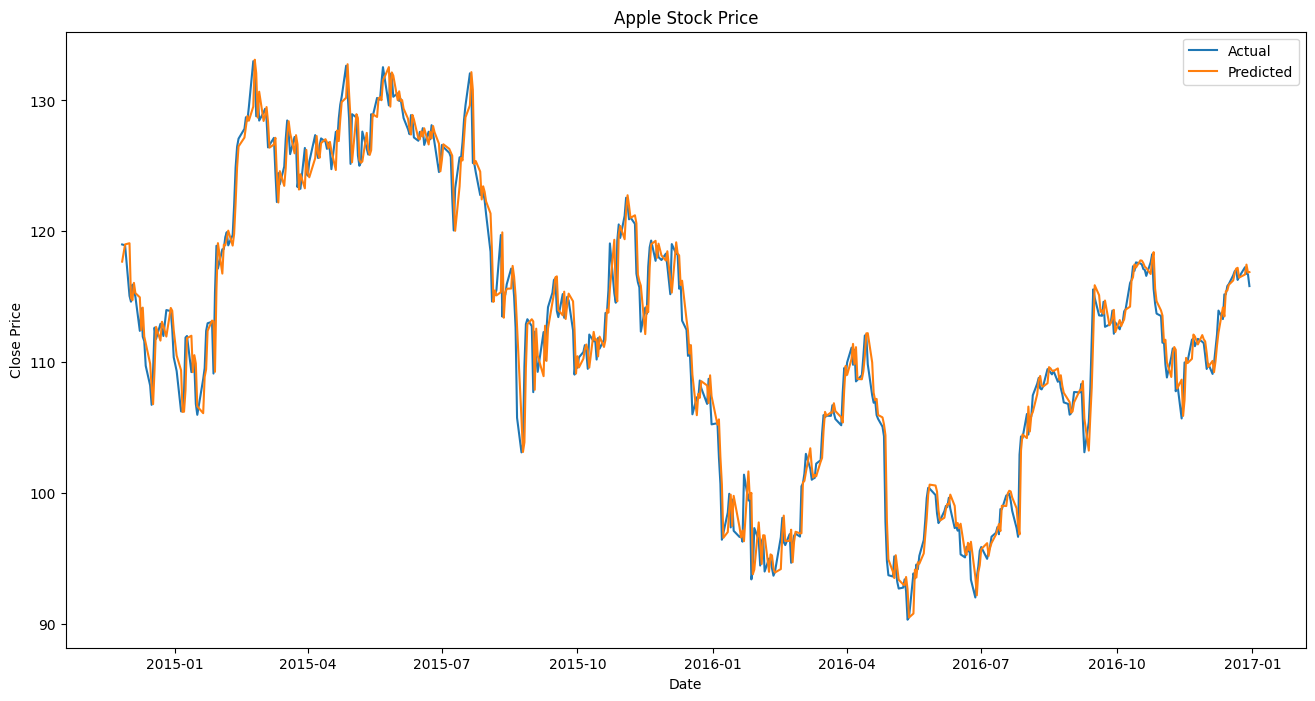

In [17]:
# make predictions on the test data
predictions = model.predict(test.drop(['date', 'close','open', 'low', 'high', 'volume'], axis=1))

# calculate the mean squared error
mse = mean_squared_error(test['close'], predictions)
print('Mean Squared Error: ', mse)

# plot the predictions vs the actual values
plt.figure(figsize=(16, 8))
plt.plot(test['date'], test['close'])
plt.plot(test['date'], predictions)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Apple Stock Price')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [18]:
# accuracy of the model
accuracy = model.score(test.drop(['date', 'close','open', 'low', 'high', 'volume'], axis=1), test['close'])
print('Accuracy: ', accuracy)

Accuracy:  0.9727720785322317


In [22]:
lag_features = test.drop(['date', 'close','open', 'low', 'high', 'volume'], axis=1).iloc[-1:].values.reshape(1, -1)

forecasted_values = []

# Forecast for the next 10 days
for _ in range(5):
    # Predict the next value
    next_value = model.predict(lag_features)[0]
    
    # Add the predicted value to the forecasted_values list
    forecasted_values = forecasted_values + [next_value]
    
    # Update the lag features
    lag_features = np.roll(lag_features, shift=-1)
    lag_features[0][-1] = next_value

# Generate future dates for the forecasted values
last_date = pd.to_datetime(test['date'].iloc[-1])
forecast_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 6)]
forecasted_values


[116.88879472556333,
 17.248248665704494,
 252.65576773769618,
 85.81512811585216,
 62.0107928084192]